# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/fifa-world-cup-2018/source/"

Mounted at /content/drive


# Read files

In [ ]:
import pandas as pd
pd.set_option("max_columns", 100)

In [ ]:
matches = pd.read_csv(path + "matches.csv")
matches_member = pd.read_csv(path + "matches_member.csv")
events = pd.read_csv(path + "events.csv")
event_kinds = pd.read_csv(path + "event_kinds.csv")
sub_event_kinds = pd.read_csv(path + "sub_event_kinds.csv")
players = pd.read_csv(path + "players.csv")
teams = pd.read_csv(path + "teams.csv")

# Pick up a game
Spain v. Russia (Spain recorded the most passes in the World Cup history)

In [ ]:
teams[teams.officialName.str.contains("Spain")].append(teams[teams.officialName.str.contains("Russia")])

,teamId,name,officialName,areaCode,areaName
137,1598,Spain,Spain,ESP,Spain
101,14358,Russia,Russia,RUS,Russia


In [ ]:
matches[matches.teamId == 1598].append(matches[matches.teamId == 14358])

,matchId,gameweek,homeAway,teamId,score,scoreP
27,2058004,0,1,1598,1,3
57,2057965,3,1,1598,2,0
89,2057963,2,2,1598,1,0
121,2057960,1,2,1598,3,0
8,2058012,0,1,14358,1,3
26,2058004,0,2,14358,1,4
62,2057958,3,2,14358,0,0
94,2057956,2,1,14358,3,0
126,2057954,1,1,14358,5,0


In [ ]:
events[events.matchId == 2058004]

,eventId,matchId,matchPeriod,teamId,playerId,beforeEventSec,eventSec,eventId.1,subEventId,goalF,keyPass,accurateF,fromX,fromY,toX,toY
77507,280214858,2058004,1H,1598,3443,3004.523863,3.470728,8,85.0,0,0,1,50,49,34,31
77508,280214859,2058004,1H,1598,3306,3.470728,6.370434,8,83.0,0,0,1,34,31,74,31
77509,280214860,2058004,1H,1598,4338,6.370434,9.801913,1,10.0,0,0,0,74,31,25,73
77510,280214869,2058004,1H,14358,103668,9.801913,9.885233,1,10.0,0,0,1,75,27,76,18
77511,280214871,2058004,1H,14358,101699,9.885233,11.627067,8,85.0,0,0,1,76,18,84,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79718,280217295,2058004,P,14358,101576,257.858743,260.101336,9,90.0,1,0,0,100,100,90,50
79719,280217301,2058004,P,14358,4513,260.101336,295.767962,3,35.0,1,0,1,90,51,100,100
79720,280217508,2058004,P,1598,7910,295.767962,298.332275,9,90.0,1,0,0,0,0,10,49
79721,280217509,2058004,P,1598,3840,298.332275,351.900151,3,35.0,0,0,0,10,50,0,0


# Narrow down the events

the events played by Spain except for the penalty

In [ ]:
events = events[(events.matchId == 2058004) & (events.matchPeriod != "P") & (events.teamId == 1598)]

Starting XI of Spain

In [ ]:
member_spain = matches_member[(matches_member.matchId == 2058004) & (matches_member.teamId == 1598) & (matches_member.startingF == 1)]

the events played by the starting XI

In [ ]:
events = events[events.playerId.isin(member_spain.playerId)]

In [ ]:
events

,eventId,matchId,matchPeriod,teamId,playerId,beforeEventSec,eventSec,eventId.1,subEventId,goalF,keyPass,accurateF,fromX,fromY,toX,toY
77507,280214858,2058004,1H,1598,3443,3004.523863,3.470728,8,85.0,0,0,1,50,49,34,31
77508,280214859,2058004,1H,1598,3306,3.470728,6.370434,8,83.0,0,0,1,34,31,74,31
77509,280214860,2058004,1H,1598,4338,6.370434,9.801913,1,10.0,0,0,0,74,31,25,73
77513,280214861,2058004,1H,1598,3563,13.367890,14.787655,7,72.0,0,0,0,77,12,78,3
77516,280214862,2058004,1H,1598,3346,34.570837,34.776601,1,11.0,0,0,1,58,14,43,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79690,280217490,2058004,E2,1598,3563,898.738116,901.901036,8,85.0,0,0,1,38,25,72,29
79697,280217497,2058004,E2,1598,3341,914.956146,924.527993,1,13.0,0,0,0,40,95,60,2
79700,280217498,2058004,E2,1598,3346,950.397001,951.592400,1,10.0,0,0,1,21,96,83,6
79703,280217499,2058004,E2,1598,7910,952.906186,960.212763,8,81.0,0,0,1,10,53,25,53


# Convert the coordinates into meter
* x: 0 is the side of Spain's goal and 100 is the opponent's one
* y: 0 is the left side for Spain and 100 is the right side
* assume the pitch size is 105m x 68m

In [ ]:
events["fromXm"] = round((events["fromY"]*68/100),1)
events["fromYm"] = round((events["fromX"]*105/100),1)
events["toXm"] = round((events["toY"]*68/100),1)
events["toYm"] = round((events["toX"]*105/100),1)

In [ ]:
events.to_csv(path + "spain_passing_events.csv",index=False)

# Calculate an average position of each player

In [ ]:
pass_events = events[events["eventId.1"] == 8]
pass_position = pass_events.groupby(["playerId"],as_index=False)
pass_position = pass_position.agg({"fromXm": "mean", "fromYm": "mean"})
pass_position = pd.merge(pass_position, players, on="playerId") #get player name

In [ ]:
pass_position

,playerId,fromXm,fromYm,clubTeamId,nationalTeamTd,playerName,firstName,middleName,lastName,positionCode,positionName
0,3269,8.124138,62.654483,676.0,1598,Jordi Alba,Jordi,NaN,Alba Ramos,DF,Defender
1,3304,55.764286,62.400000,675.0,1598,Nacho,Jos\u00e9 Ignacio,NaN,Fern\u00e1ndez Iglesias,DF,Defender
2,3306,18.712069,52.589655,675.0,1598,Sergio Ramos,Sergio,NaN,Ramos Garc\u00eda,DF,Defender
3,3341,40.435484,47.575806,676.0,1598,Piqu\u00e9,Gerard,NaN,Piqu\u00e9 Bernab\u00e9u,DF,Defender
4,3346,29.101299,55.383117,676.0,1598,Sergio Busquets,Sergio,NaN,Busquets i Burgos,MD,Midfielder
5,3443,42.106494,59.497403,679.0,1598,Koke,Jorge,NaN,Resurrecci\u00f3n Merodio,MD,Midfielder
6,3563,21.641060,70.737748,675.0,1598,Isco,Francisco Rom\u00e1n,NaN,Alarc\u00f3n Su\u00e1rez,MD,Midfielder
7,4338,23.108333,67.291667,679.0,1598,Diego Costa,Diego,NaN,da Silva Costa,FW,Forward
8,7910,31.723529,11.364706,1611.0,1598,David de Gea,David,NaN,de Gea Quintana,GK,Goalkeeper
9,8317,30.490323,68.212903,1625.0,1598,David Silva,David Josu\u00e9,NaN,Jim\u00e9nez Silva,MD,Midfielder


# Calculate the distance of the accurate passes

In [ ]:
import numpy as np

accurate_pass_events = events[(events["eventId.1"] == 8) & (events["accurateF"] == 1)]

accurate_pass_events["distance"] = np.sqrt(
  (abs(
    accurate_pass_events["toXm"] - accurate_pass_events["fromXm"]
  ) ** 2 + abs(
  accurate_pass_events["toYm"] - accurate_pass_events["fromYm"]
  ) ** 2).values
)

<ipython-input-15-cea49a99d591>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accurate_pass_events["distance"] = np.sqrt(


# Calculate the angles

In [ ]:
from numpy import linalg as LA

def calc_degree(fromX, fromY, toX, toY):
  u = np.array([fromX - fromX, 105 - fromY])
  v = np.array([toX - fromX, toY - fromY])
  i = np.inner(u, v)
  n = LA.norm(u) * LA.norm(v)
  c = i / n
  a = np.rad2deg(np.arccos(np.clip(c, -1.0, 1.0)))
  if toX - fromX < 0:
    a = 360 - a
  
  return a
def calc_pass_theta(row):
  return round(
    calc_degree(
      row["fromXm"],
      row["fromYm"],
      row["toXm"],
      row["toYm"]
    )
  )
  
#Apply function each row
accurate_pass_events["angle"] = accurate_pass_events.apply(
  calc_pass_theta,
  axis=1
)

<ipython-input-16-ff11a1ac2cbc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accurate_pass_events["angle"] = accurate_pass_events.apply(


In [ ]:
accurate_pass_events[["fromXm", "toXm", "fromYm", "toYm", "distance", "angle"]]

,fromXm,toXm,fromYm,toYm,distance,angle
77507,33.3,21.1,52.5,35.7,20.762466,216
77508,21.1,21.1,35.7,77.7,42.000000,0
77519,25.8,29.9,35.7,48.3,13.250283,18
77520,29.9,11.6,48.3,66.2,25.598828,314
77521,11.6,10.2,66.2,76.6,10.493808,352
...,...,...,...,...,...,...
79676,38.8,34.7,56.7,67.2,11.272089,339
79677,34.7,27.2,67.2,78.8,13.813399,327
79679,4.8,15.0,89.2,91.4,10.434558,78
79690,17.0,19.7,39.9,75.6,35.801955,4


# Divide the pass angle into 8 directions

In [ ]:
def divide(angle, divisions):
  degree = 360 / divisions
  division = ((angle + (degree / 2)) // degree) + 1
  if division > angle:
    division = 1
  return division

def divide_pass_direction(row):
  return divide(row["angle"], 8)
  
accurate_pass_events["direction"] = accurate_pass_events.apply(divide_pass_direction, axis=1)

<ipython-input-18-1797a9670afb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accurate_pass_events["direction"] = accurate_pass_events.apply(divide_pass_direction, axis=1)


In [ ]:
accurate_pass_events = accurate_pass_events.replace({"direction": {9: 1}})

# Group the accurate passes by the players and the directions

In [ ]:
pass_sonar = accurate_pass_events.groupby(["playerId", "direction"], as_index=False)
pass_sonar = pass_sonar.agg({"distance": "mean", "eventId": "count"})
pass_sonar = pass_sonar.rename(columns={"eventId": "amount"})

In [ ]:
pass_sonar

,playerId,direction,distance,amount
0,3269,1.0,17.484902,23
1,3269,2.0,12.800697,13
2,3269,3.0,16.497007,41
3,3269,4.0,19.306070,43
4,3269,5.0,17.893594,2
...,...,...,...,...
76,288091,4.0,14.165299,5
77,288091,5.0,16.444547,5
78,288091,6.0,18.736745,7
79,288091,7.0,22.218559,11


# Visualization

(0.0, 105.0)

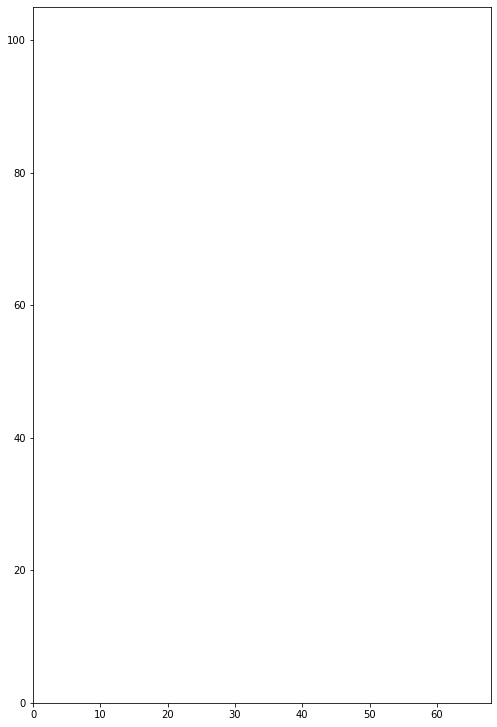

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8.2, 12.8))
ax = fig.add_subplot(111)
ax.set_xlim(0, 68) #Horizontal pitch size 
ax.set_ylim(0, 105) #Vertical pitch size

## Plot pass sonars on the average postions of each player

In [ ]:
import matplotlib.patches as pat
for _, player in pass_position.iterrows():
  ax.text(
    player.fromXm,
    player.fromYm,
    player.playerName.encode().decode("unicode-escape"),
    ha="center",
    va="center",
    color="black"
  )
  
  for _, pass_detail in pass_sonar[pass_sonar.playerId == player.playerId].iterrows():
    #Start degree of direction 1
    theta_left_start = 112.5
    
    #Color coding by distance
    color = "darkred"
    if pass_detail.distance < 15:
      color = "gold"
    elif pass_detail.distance < 25:
      color = "darkorange"
    #Calculate degree in matplotlib figure
    theta_left = theta_left_start - (360 / 8) * (pass_detail.direction - 1)
    theta_right = theta_left - (360 / 8)
    
    pass_wedge = pat.Wedge(
      center=(player.fromXm, player.fromYm),
      r=int(pass_detail.amount)*0.2,
      theta1=theta_right,
      theta2=theta_left,
      facecolor=color,
      edgecolor="white"
    )

    ax.add_patch(pass_wedge)

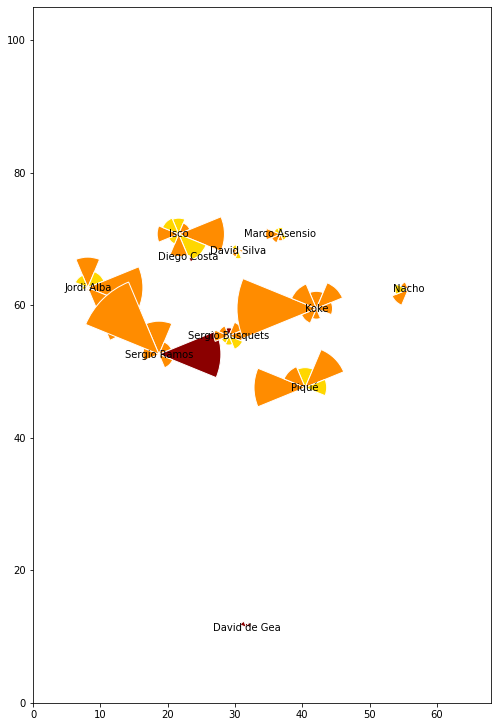

In [ ]:
fig

## Make it look better

In [ ]:
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
ax.axis("off")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Figure size 432x288 with 0 Axes>

You can paste it to any image (like an image of football pitch)

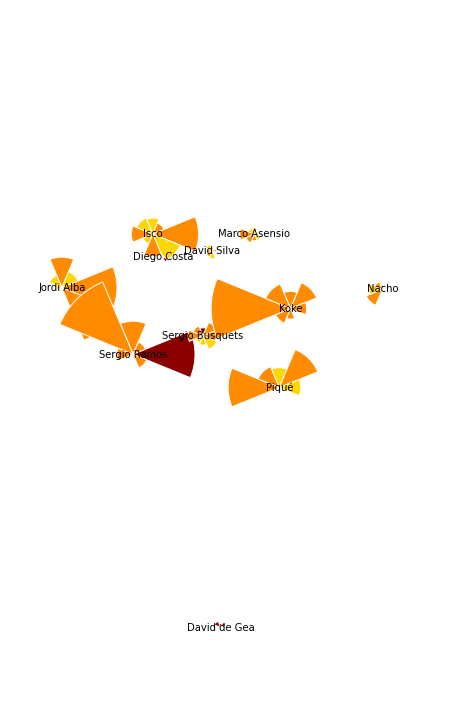

In [ ]:
fig